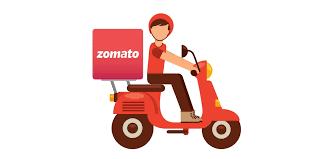

## <center><span style='color:red'> Zomato : Exploratory Data Analysis</span></center>

### 🥫Import Necessary Libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import random
from wordcloud import WordCloud
import zipfile

### 🥫Import Data :

In [2]:
with zipfile.ZipFile('zomato.zip','r') as zip_file:
    file_list = zip_file.namelist()
    file_name = 'zomato_restaurants_in_India.csv'
    for file in file_list:
        if file == file_name:
            with zip_file.open(file_name) as csv_file:
                df = pd.read_csv(csv_file)

In [3]:
df.head(3)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1


In [4]:
df.tail()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1
211943,18879846,Freshco's - The Health Cafe,['Café'],https://www.zomato.com/vadodara/freshcos-the-h...,"Shop 7, Ground Floor, Opposite Natubhai Circle...",Vadodara,32,Vadiwadi,22.309935,73.158768,...,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.0,Very Good,93,53,0.0,1,-1


In [5]:
df[df['city']=='Pune']

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
164447,11283,Harajuku - The O Hotel,['Fine Dining'],https://www.zomato.com/pune/harajuku-the-o-hot...,"The O Hotel, North Main Road, Koregaon Park, Pune",Pune,5,"The O Hotel, Koregaon Park",18.540239,73.887518,...,4,Rs.,"['Cash', 'Debit Card', 'Lunch', 'Credit Card',...",3.7,Good,96,38,0.0,-1,-1
164448,10663,Mix@36 - The Westin,['Lounge'],https://www.zomato.com/pune/mix@36-the-westin-...,"The Westin, Survey 36/3B, KP Annexe Mundhwa Ro...",Pune,5,"The Westin, Mundhwa",18.540040,73.905910,...,4,Rs.,"['Cash', 'Debit Card', 'Serves Alcohol', 'Take...",4.0,Very Good,682,78,0.0,-1,-1
164449,10743,Kangan - The Westin,['Fine Dining'],https://www.zomato.com/pune/kangan-the-westin-...,"The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...",Pune,5,"The Westin, Mundhwa",18.539455,73.906040,...,4,Rs.,"['Serves Alcohol', 'Cash', 'Debit Card', 'Take...",4.0,Very Good,310,285,0.0,-1,-1
164450,18938162,Palette - The Westin,['Fine Dining'],https://www.zomato.com/pune/palette-the-westin...,"The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...",Pune,5,"The Westin, Mundhwa",18.539430,73.906009,...,4,Rs.,"['Serves Alcohol', 'Credit Card', 'Lunch', 'Ca...",3.3,Average,9,31,0.0,-1,-1
164451,18310167,Coriander Kitchen - Conrad Pune,['Fine Dining'],https://www.zomato.com/pune/coriander-kitchen-...,"Conrad, Mangaldas Road, Bund Garden Road, Pune",Pune,5,"Conrad Pune, Bund Garden Road",18.535409,73.883592,...,4,Rs.,"['Lunch', 'Serves Alcohol', 'Takeaway Availabl...",4.4,Very Good,500,1116,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168659,13061,Lonavla Restaurant & Bar- Hotel Lonavla,['Casual Dining'],https://www.zomato.com/pune/lonavla-restaurant...,"Gawlinaka, Mumbai-Pune Highway, Lonavala, Pune",Pune,5,Lonavala,18.754747,73.405682,...,3,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.3,Very Good,474,81,0.0,-1,-1
168660,18555341,Utopia,['Casual Dining'],https://www.zomato.com/pune/utopia-lonavala?ut...,"CTS 159, Old Mumbai-Pune Road, Lonavala, Pune",Pune,5,Lonavala,18.754342,73.402737,...,3,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",3.9,Good,336,204,0.0,-1,-1
168661,18767059,Mapro Garden,['Casual Dining'],https://www.zomato.com/pune/mapro-garden-lonav...,"3 & 4, Old Mumbai - Pune Highway, Valvan, Lona...",Pune,5,Lonavala,18.760234,73.419775,...,2,Rs.,"['Dinner', 'Takeaway Available', 'No Alcohol A...",4.3,Very Good,143,227,0.0,-1,-1
168662,6503906,Hotel Chandralok,['Casual Dining'],https://www.zomato.com/pune/hotel-chandralok-l...,"Near Bus Stand & Post Office, Opposite Mumbai-...",Pune,5,Lonavala,18.753223,73.405655,...,2,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.3,Very Good,317,86,0.0,-1,-1


In [6]:
df.shape

(211944, 26)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
res_id,211944.0,1.349411e+07,7.883722e+06,50.0,3.301027e+06,1.869573e+07,1.881297e+07,1.915979e+07
city_id,211944.0,4.746785e+03,5.568766e+03,1.0,1.100000e+01,3.400000e+01,1.130600e+04,1.135400e+04
latitude,211944.0,2.149976e+01,2.278133e+01,0.0,1.549607e+01,2.251449e+01,2.684167e+01,1.000000e+04
longitude,211944.0,7.761528e+01,7.500104e+00,0.0,7.487796e+01,7.742597e+01,8.021932e+01,9.183277e+01
country_id,211944.0,1.000000e+00,0.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
average_cost_for_two,211944.0,5.958122e+02,6.062394e+02,0.0,2.500000e+02,4.000000e+02,7.000000e+02,3.000000e+04
price_range,211944.0,1.882535e+00,8.929891e-01,1.0,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00
aggregate_rating,211944.0,3.395937e+00,1.283642e+00,0.0,3.300000e+00,3.800000e+00,4.100000e+00,4.900000e+00
votes,211944.0,3.780019e+02,9.253334e+02,-18.0,1.600000e+01,1.000000e+02,3.620000e+02,4.253900e+04
photo_count,211944.0,2.569712e+02,8.676689e+02,0.0,3.000000e+00,1.800000e+01,1.280000e+02,1.770200e+04


### 🥫Preprocessing :

#### * Remove Dupliactes :

In [9]:
df.duplicated().sum()

151527

In [10]:
df[df.duplicated()]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
101,3400059,Peshawri - ITC Mughal,['Fine Dining'],https://www.zomato.com/agra/peshawri-itc-mugha...,"ITC Mughal, Fatehabad Road, Tajganj, Agra",Agra,34,"ITC Mughal, Tajganj",27.161150,78.043993,...,4,Rs.,"['Lunch', 'Cash', 'Credit Card', 'Dinner', 'De...",4.4,Very Good,353,154,0.0,-1,-1
116,3400060,Taj Bano - ITC Mughal,['Fine Dining'],https://www.zomato.com/agra/taj-bano-itc-mugha...,"ITC Mughal, Fatehabad Road, Tajganj, Agra",Agra,34,"ITC Mughal, Tajganj",27.161132,78.044022,...,4,Rs.,"['Credit Card', 'Lunch', 'Cash', 'Debit Card',...",4.3,Very Good,96,205,0.0,-1,-1
140,3400017,Pinch Of Spice,['Casual Dining'],https://www.zomato.com/agra/pinch-of-spice-civ...,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Agra,34,Civil Lines,27.201735,78.007625,...,4,Rs.,"['Lunch', 'Delivery', 'Credit Card', 'Dinner',...",4.6,Excellent,915,105,0.0,1,-1
141,3400018,Pinch Of Spice,['Casual Dining'],https://www.zomato.com/agra/pinch-of-spice-taj...,"1076/2, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.159649,78.043304,...,4,Rs.,"['Delivery', 'Dinner', 'Cash', 'Credit Card', ...",4.6,Excellent,965,690,0.0,1,-1
142,3400850,Urban Deck,['Casual Dining'],https://www.zomato.com/agra/urban-deck-2-civil...,"5th Floor, The P L Palace Hotel, MG Road, Sanj...",Agra,34,Civil Lines,27.199573,78.003699,...,4,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Takeaway Ava...",4.3,Very Good,672,192,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211937,18855810,Biryani aur Baatein,['Casual Dining'],https://www.zomato.com/vadodara/biryani-aur-ba...,"Shop 14, Atlantis K-10, A Wing, Genda Circle R...",Vadodara,32,Alkapuri,22.317746,73.168043,...,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,154,96,0.0,-1,-1
211938,18662583,Wok On Fire,['Casual Dining'],https://www.zomato.com/vadodara/wok-on-fire-fa...,"Ground Floor 1, Rossette Building, Opposite Se...",Vadodara,32,Fatehgunj,22.323357,73.187461,...,3,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,301,126,0.0,1,-1
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1


In [11]:
df[df['res_id']==3400059]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
57,3400059,Peshawri - ITC Mughal,['Fine Dining'],https://www.zomato.com/agra/peshawri-itc-mugha...,"ITC Mughal, Fatehabad Road, Tajganj, Agra",Agra,34,"ITC Mughal, Tajganj",27.16115,78.043993,...,4,Rs.,"['Lunch', 'Cash', 'Credit Card', 'Dinner', 'De...",4.4,Very Good,353,154,0.0,-1,-1
101,3400059,Peshawri - ITC Mughal,['Fine Dining'],https://www.zomato.com/agra/peshawri-itc-mugha...,"ITC Mughal, Fatehabad Road, Tajganj, Agra",Agra,34,"ITC Mughal, Tajganj",27.16115,78.043993,...,4,Rs.,"['Lunch', 'Cash', 'Credit Card', 'Dinner', 'De...",4.4,Very Good,353,154,0.0,-1,-1
317,3400059,Peshawri - ITC Mughal,['Fine Dining'],https://www.zomato.com/agra/peshawri-itc-mugha...,"ITC Mughal, Fatehabad Road, Tajganj, Agra",Agra,34,"ITC Mughal, Tajganj",27.16115,78.043993,...,4,Rs.,"['Lunch', 'Cash', 'Credit Card', 'Dinner', 'De...",4.4,Very Good,353,154,0.0,-1,-1
532,3400059,Peshawri - ITC Mughal,['Fine Dining'],https://www.zomato.com/agra/peshawri-itc-mugha...,"ITC Mughal, Fatehabad Road, Tajganj, Agra",Agra,34,"ITC Mughal, Tajganj",27.16115,78.043993,...,4,Rs.,"['Lunch', 'Cash', 'Credit Card', 'Dinner', 'De...",4.4,Very Good,353,154,0.0,-1,-1
847,3400059,Peshawri - ITC Mughal,['Fine Dining'],https://www.zomato.com/agra/peshawri-itc-mugha...,"ITC Mughal, Fatehabad Road, Tajganj, Agra",Agra,34,"ITC Mughal, Tajganj",27.16115,78.043993,...,4,Rs.,"['Lunch', 'Cash', 'Credit Card', 'Dinner', 'De...",4.4,Very Good,353,154,0.0,-1,-1
1443,3400059,Peshawri - ITC Mughal,['Fine Dining'],https://www.zomato.com/agra/peshawri-itc-mugha...,"ITC Mughal, Fatehabad Road, Tajganj, Agra",Agra,34,"ITC Mughal, Tajganj",27.16115,78.043993,...,4,Rs.,"['Lunch', 'Cash', 'Credit Card', 'Dinner', 'De...",4.4,Very Good,353,154,0.0,-1,-1
1827,3400059,Peshawri - ITC Mughal,['Fine Dining'],https://www.zomato.com/agra/peshawri-itc-mugha...,"ITC Mughal, Fatehabad Road, Tajganj, Agra",Agra,34,"ITC Mughal, Tajganj",27.16115,78.043993,...,4,Rs.,"['Lunch', 'Cash', 'Credit Card', 'Dinner', 'De...",4.4,Very Good,353,154,0.0,-1,-1
1946,3400059,Peshawri - ITC Mughal,['Fine Dining'],https://www.zomato.com/agra/peshawri-itc-mugha...,"ITC Mughal, Fatehabad Road, Tajganj, Agra",Agra,34,"ITC Mughal, Tajganj",27.16115,78.043993,...,4,Rs.,"['Lunch', 'Cash', 'Credit Card', 'Dinner', 'De...",4.4,Very Good,353,154,0.0,-1,-1
2049,3400059,Peshawri - ITC Mughal,['Fine Dining'],https://www.zomato.com/agra/peshawri-itc-mugha...,"ITC Mughal, Fatehabad Road, Tajganj, Agra",Agra,34,"ITC Mughal, Tajganj",27.16115,78.043993,...,4,Rs.,"['Lunch', 'Cash', 'Credit Card', 'Dinner', 'De...",4.4,Very Good,353,154,0.0,-1,-1
2149,3400059,Peshawri - ITC Mughal,['Fine Dining'],https://www.zomato.com/agra/peshawri-itc-mugha...,"ITC Mughal, Fatehabad Road, Tajganj, Agra",Agra,34,"ITC Mughal, Tajganj",27.16115,78.043993,...,4,Rs.,"['Lunch', 'Cash', 'Credit Card', 'Dinner', 'De...",4.4,Very Good,353,154,0.0,-1,-1


In [12]:
(df.duplicated().sum()/df.shape[0])*100

71.49388517721663

* 71 % data is duplicate

In [13]:
df.drop_duplicates(['res_id'], keep='first', inplace=True)

#### * Check missing values

In [14]:
df.isnull().sum().sort_values(ascending=False)

zipcode                 44623
timings                  1003
cuisines                  470
address                    18
opentable_support          12
delivery                    0
photo_count                 0
votes                       0
rating_text                 0
aggregate_rating            0
highlights                  0
currency                    0
price_range                 0
average_cost_for_two        0
res_id                      0
name                        0
locality_verbose            0
country_id                  0
longitude                   0
latitude                    0
locality                    0
city_id                     0
city                        0
url                         0
establishment               0
takeaway                    0
dtype: int64

In [15]:
missing_var = df.isnull().sum().sort_values(ascending=False)[:5]
missing_var

zipcode              44623
timings               1003
cuisines               470
address                 18
opentable_support       12
dtype: int64

In [34]:
(missing_var/df.shape[0])*100

zipcode              80.303412
timings               1.804996
cuisines              0.845811
address               0.032393
opentable_support     0.021595
dtype: float64

* Zipcode has 80% missing values so we better can drop it

#### * Ommiting not useful features

In [17]:
df['res_id'].nunique()

55568

* res_id : unique ID for each restaurant

In [18]:
df['establishment'].unique()

array(["['Quick Bites']", "['Casual Dining']", "['Bakery']", "['Café']",
       "['Dhaba']", "['Bhojanalya']", "['Bar']", "['Sweet Shop']",
       "['Fine Dining']", "['Food Truck']", "['Dessert Parlour']",
       "['Lounge']", "['Pub']", "['Beverage Shop']", "['Kiosk']",
       "['Paan Shop']", "['Confectionery']", '[]', "['Shack']",
       "['Club']", "['Food Court']", "['Mess']", "['Butcher Shop']",
       "['Microbrewery']", "['Cocktail Bar']", "['Pop up']",
       "['Irani Cafe']"], dtype=object)

* establishment looks useful feature to categories resturants
* we need to remove unecessary brackets and quotes from the feature

In [19]:
df['establishment'] = df['establishment'].apply(lambda x : x[2:-2])

* we have one empty value lets replace it with Na

In [20]:
df['establishment'].unique()

array(['Quick Bites', 'Casual Dining', 'Bakery', 'Café', 'Dhaba',
       'Bhojanalya', 'Bar', 'Sweet Shop', 'Fine Dining', 'Food Truck',
       'Dessert Parlour', 'Lounge', 'Pub', 'Beverage Shop', 'Kiosk',
       'Paan Shop', 'Confectionery', '', 'Shack', 'Club', 'Food Court',
       'Mess', 'Butcher Shop', 'Microbrewery', 'Cocktail Bar', 'Pop up',
       'Irani Cafe'], dtype=object)

In [21]:
df[df['establishment']==''].head(3)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
208,18691949,Sadar Wala,,https://www.zomato.com/agra/sadar-wala-shahgan...,"100 Feet Road, Maruti Estate, Near Simpkins Sc...",Agra,34,Shahganj,27.182653,77.966487,...,1,Rs.,"['Cash', 'Takeaway Available']",3.8,Good,156,11,0.0,-1,-1
230,18998759,Agra Puri Bhandar,,https://www.zomato.com/agra/agra-puri-bhandar-...,"Purani Mandi Circle, Tajganj, Agra",Agra,34,Tajganj,27.167421,78.036395,...,1,Rs.,"['Dinner', 'Takeaway Available', 'Lunch', 'Cas...",3.1,Average,8,2,0.0,-1,-1
233,18965086,Sagar Chowmein,,https://www.zomato.com/agra/sagar-chowmein-kam...,"In Front Of Balkeshwar Park, Kamla Nagar, Agra",Agra,34,Kamla Nagar,27.212712,78.030463,...,1,Rs.,"['Dinner', 'Cash', 'Standing Tables', 'Takeawa...",3.4,Average,14,1,0.0,1,-1


* 1830 entries have empty string
* lets treat them as missing values

In [22]:
df['establishment'].replace({'':np.NaN},inplace=True)

In [23]:
df['establishment'].isnull().sum()

1830

* url : not useful for us
* address : contains a long string and difficult to classify so not much useful


In [24]:
df['city'].unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

In [25]:
df['city'].nunique()

99

* city : feature is useful
* city_id : we can uniquely use city name or id. so one feature is enough

In [26]:
df['locality'].unique()

array(['Khandari', 'Agra Cantt', 'Shahganj', ..., 'Navapura',
       'L&T Knowledge City', 'Danteshwar'], dtype=object)

In [27]:
df['locality'].nunique()

3731

In [28]:
df[df['city']=='Pune']['locality'].nunique()

168

* locality : is intresting feature but has wide range so will avoid using it
* longitude : useful to plot geographic location but we are not doing it here
* latitude : same as above
* country_id : as current data is of Indian restaurants only so country id will be same for all

In [29]:
df['country_id'].unique()

array([1], dtype=int64)

In [31]:
df[['locality_verbose','locality']]

,locality_verbose,locality
0,"Khandari, Agra",Khandari
1,"Agra Cantt, Agra",Agra Cantt
2,"Shahganj, Agra",Shahganj
3,"Civil Lines, Agra",Civil Lines
4,"Tajganj, Agra",Tajganj
...,...,...
211882,"Manjalpur, Vadodara",Manjalpur
211925,"Alkapuri, Vadodara",Alkapuri
211926,"Alkapuri, Vadodara",Alkapuri
211940,"Karelibaug, Vadodara",Karelibaug


* locality verbose : looks very similar to locality

In [32]:
df['cuisines'].nunique()

9382

In [33]:
df['cuisines'].unique()

array(['North Indian, South Indian, Mithai, Street Food, Desserts',
       'North Indian, Mughlai, Rolls, Chinese, Fast Food, Street Food',
       'Fast Food, Mithai', ...,
       'Street Food, Biryani, Chinese, Fast Food, North Indian, Mughlai',
       'North Indian, Chinese, Mexican, Italian, Thai, Continental',
       'North Indian, Lucknowi, Chinese'], dtype=object)

In [37]:
df['cuisines'].isnull().sum()

470

In [38]:
df['cuisines'].fillna('No cuisines',inplace=True)

In [39]:
df['cuisines'].isnull().sum()

0

In [41]:
cuisines = []
df['cuisines'].apply(lambda x : cuisines.extend(x.split(", ")))
cuisines = pd.Series(cuisines)
print("Total unique cuisins:", cuisines.nunique())

Total unique cuisins: 134


In [42]:
df['timings'].unique()

array(['8:30am – 10:30pm (Mon-Sun)',
       '12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat, Sun), 1PM to 12Midnight (Tue)',
       '9:30 AM to 11 PM', ..., '8am – 2:30pm, 5pm – 10pm (Mon-Sun)',
       '8am – 3pm, 6:30pm – 11pm (Mon-Sun)',
       '4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm – 11:30pm (Thu)'],
      dtype=object)

In [43]:
df['timings'].nunique()

7740

* timings - This also has missing data, however it has 7740 unique classes. Also, it is not structured even if we try to reduce the number classes like we did in cuisines. Its better to omit it altogether.

In [44]:
df['average_cost_for_two'].unique()

array([  700,   600,   300,  1000,   400,   500,  1200,  1600,   250,
         200,   150,  1500,   800,   450,   850,   350,   900,  6000,
         650,   550,  2500,  6500,  5500,  4300,  3600,  3500,  3200,
        3000,  2800,  2000,  1800,  1400,  1300,  1250,  1150,  1100,
        1050,    50,    60,   100,   750,     0,   220,   260,   950,
        1900,  2400,  2300,  2200,  1700,  1230,    70,   140,   120,
         470,    20,    40,   110,    80,    90,   440,  2100, 14000,
        5000,  4500,  4100,  4000,  3700,  3400,  2700,  2600,  1650,
        1350,   180,  1260,     2,   197,   312,   170,   240,   330,
        3100,  4200,  1850,  3300,  4800,  3800,  3250,  2900,  1750,
         282,    35,   149,  1550,  5100,  6600,  1450,   160,  2250,
        8000,  7000,  3900,  3650,  1020,   320,   360,   280,   130,
       15000,  2501,    30,  1950,  1875,  1190,   309, 12000,   380,
         299,    45,   190,  4600,   880,    75,   620,   999, 10000,
         505, 30000,

In [45]:
df['average_cost_for_two'].nunique()

145

* average_cost_for_two : good feature for analysis but need to handle outliers like value 0,2

In [47]:
df['price_range'].unique()

array([2, 1, 3, 4], dtype=int64)

* price_range : categorised feature

In [49]:
df['currency'].unique()

array(['Rs.'], dtype=object)

* currency has only one class so not useful

In [50]:
df['highlights'].unique()

array(["['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']",
       "['Delivery', 'No Alcohol Available', 'Dinner', 'Takeaway Available', 'Lunch', 'Cash', 'Indoor Seating']",
       "['No Alcohol Available', 'Dinner', 'Takeaway Available', 'Breakfast', 'Lunch', 'Cash', 'Delivery', 'Outdoor Seating', 'Air Conditioned', 'Self Service', 'Indoor Seating', 'Digital Payments Accepted', 'Pure Veg', 'Desserts and Bakes']",
       ...,
       "['Dinner', 'Delivery', 'Cash', 'Takeaway Available', 'Free Parking', 'Digital Payments Accepted', 'Pure Veg', 'Indoor Seating']",
       "['Dinner', 'Cash', 'Takeaway Available', 'Lunch', 'Delivery', 'Free Parking', 'Indoor Seating', 'Air Conditioned', 'Outdoor Seating', 'Digital Payments Accepted', 'Catering Available', 'Pure Veg']",
       "['Dinner', 'Cash', 'Takeaway Available', 'Debit Card', 'Delivery', 'Credit Card', 'Free Parking', 'Outdoor Seating']"],
      dtype=object)

In [51]:
df['highlights'].nunique()

31228

In [53]:
hl = []
df['highlights'].apply(lambda x : hl.extend(x[2:-2].split("', '")))
hl = pd.Series(hl)
print("total unique highlights :", hl.nunique())

total unique highlights : 104


In [54]:
df['aggregate_rating'].unique()

array([4.4, 4.2, 4.3, 4.9, 4. , 3.8, 3.4, 4.1, 3.5, 4.6, 3.9, 3.6, 4.5,
       4.7, 3.7, 4.8, 3.2, 0. , 3.3, 2.8, 3.1, 2.6, 3. , 2.7, 2.9, 2.2,
       2.3, 2.4, 2.5, 2.1, 1.8, 2. , 1.9])

In [55]:
df['aggregate_rating'].nunique()

33

In [56]:
df['rating_text'].unique()

array(['Very Good', 'Excellent', 'Good', 'Average', 'Not rated', 'Poor',
       'Bardzo dobrze', 'Muito Bom', 'İyi', 'Çok iyi', 'Baik',
       'Sangat Baik', 'Skvělé', 'Muy Bueno', 'Průměr', 'Ortalama',
       'Skvělá volba', 'Muito bom', 'Velmi dobré', 'Excelente', 'Bom',
       'Scarso', 'Promedio', 'Vynikajúce', 'Bueno', 'Dobré', 'Terbaik',
       'Harika', 'Veľmi dobré', 'Eccellente', 'Buono', 'Média', 'Dobrze'],
      dtype=object)

In [57]:
df['rating_text'].nunique()

33

* rating_text : nothing but the characterization of average_rating. we need to use only single feature

In [58]:
df['votes'].unique()

array([ 814, 1203,  801, ..., 2001, 1191, 1583], dtype=int64)

* votes : number of votes contributed to the rating

In [60]:
df['photo_count'].unique()

array([154, 161, 107, ..., 987, 678, 828], dtype=int64)

* photo_count : photo uploaded in reviews

In [63]:
df[['aggregate_rating','votes','photo_count']].describe()

,aggregate_rating,votes,photo_count
count,55568.000000,55568.000000,55568.000000
mean,2.958593,223.330352,160.974770
std,1.464576,618.224019,586.975382
min,0.000000,-18.000000,0.000000
25%,2.900000,6.000000,1.000000
50%,3.500000,35.000000,10.000000
75%,3.900000,175.000000,69.000000
max,4.900000,42539.000000,17702.000000


* rating ranges between 0 to 5
* negative votes might be outliers

In [64]:
df['opentable_support'].unique()

array([ 0., nan])

* opentable_support : no restaurant have positive value for this. we can drop this feature

In [66]:
df['delivery'].unique()

array([-1,  1,  0], dtype=int64)

In [67]:
df['delivery'].value_counts()

-1    37346
 1    17907
 0      315
Name: delivery, dtype: int64

* delivery : delivery should have two classes only. -1 can be considered as 0 as providing no delivery

In [68]:
df['takeaway'].unique()

array([-1], dtype=int64)

* takeaway : has only 1 class so this feature is not useful

### 🥫Exploratory Data Analysis (EDA) :

In [69]:
df['name'].value_counts()

Domino's Pizza                           399
Cafe Coffee Day                          315
KFC                                      204
Baskin Robbins                           202
Keventers                                189
                                        ... 
Boulevard 69                               1
7-Eleven Restaurant                        1
Food station                               1
Silver Saloon - Taj Usha Kiran Palace      1
Geeta lodge                                1
Name: name, Length: 41100, dtype: int64

In [70]:
outlets = df['name'].value_counts()
chains = outlets[outlets >= 2]
single = outlets[outlets == 1]

In [71]:
print("Total restaurants :", df.shape[0])
print("Total restaurants that are part of some chain :", df.shape[0] - single.shape[0])
print("% of restaurants that are part of some chain :",((df.shape[0] - single.shape[0])/df.shape[0])*100,'%' )

Total restaurants : 55568
Total restaurants that are part of some chain : 19358
% of restaurants that are part of some chain : 34.83659660236107 %


* Top 10 resturant chains

In [72]:
chains.head(10)

Domino's Pizza     399
Cafe Coffee Day    315
KFC                204
Baskin Robbins     202
Keventers          189
Subway             178
McDonald's         130
Pizza Hut          125
Barbeque Nation    112
Burger King        110
Name: name, dtype: int64

In [73]:
top10_chains = df['name'].value_counts()[:10].sort_values(ascending=True)

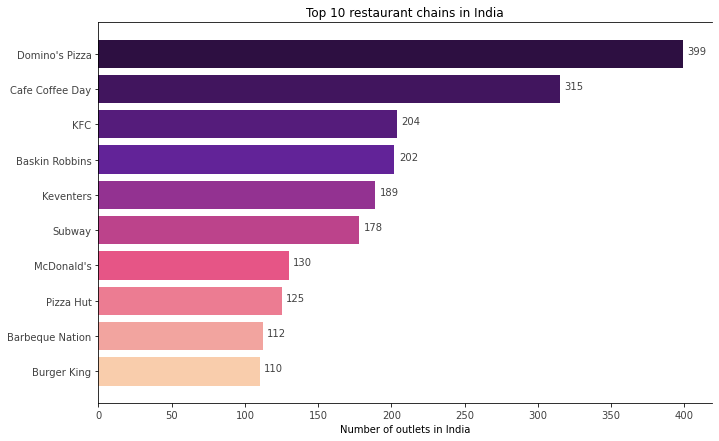

In [76]:
height = top10_chains.values
bars = top10_chains.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=(11,7), frameon=False)
ax = fig.gca()
ax.spines['top'].set_visible('#424242')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible('#424242')
ax.spines['bottom'].set_visible('#424242')

colors = ['#f9cdac','#f2a49f','#ec7c92','#e65586','#bc438b','#933291','#622398','#551c7b','#41155e','#2d0f41']

plt.barh(y_pos, height, color=colors)
plt.xticks(color='#424242')
plt.yticks(y_pos, bars, color='#424242')
plt.xlabel("Number of outlets in India")

for i, v in enumerate(height):
    ax.text(v+3,i,str(v),color='#424242')
    
plt.title("Top 10 restaurant chains in India")
plt.show()